# <center> Titanic Dataset Analysis <br>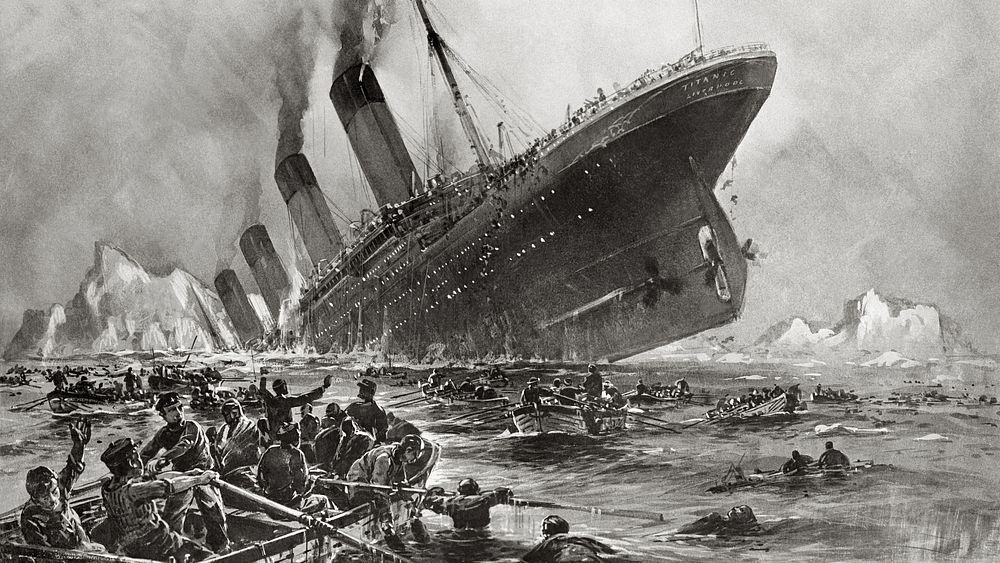

#### About Dataset
It contains 15 columns and 891 records. Some key columns are listed as-
* Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived). 
* Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [1]:
# IMPORTING WARNINGS LIBRARY TO IGNORE ANY WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [2]:
# IMPORTING DESIERED LIBRARIED FOR EDA AND PLOTS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# LOAD THE TITANIC DATASET FROM SEABORN
data = sns.load_dataset('titanic')

In [4]:
# PRINTING SHAPE AND MINI DATA DISPLAY
print(data.shape)
data.head(2)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [5]:
# QUICK INFO ABOUT THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# CHECKING PRESENCE OF NULL VALUES
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

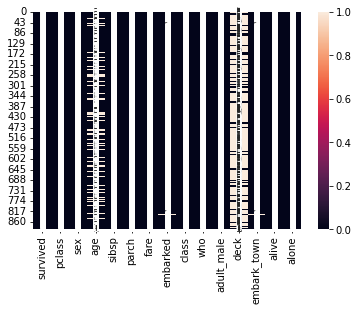

In [7]:
# VISUALIZING THROUGH HEATMAP
sns.heatmap(data.isna(), annot=True);

In [8]:
# DISPLAY DATA WHERE EMBARKED HAS NULL VALUES
data[data.embarked.isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [9]:
# %AGE OF DATA LOSS IF WE REMOVE THE ROWS WHERE EMBARKED IS NULL
len(data[data.embarked.isna()])/len(data[~(data.embarked.isna()) & (data.survived == 1)])*100

0.5882352941176471

### Since there is roughly any loss is survival data, So we can remove the null rows of embarked column

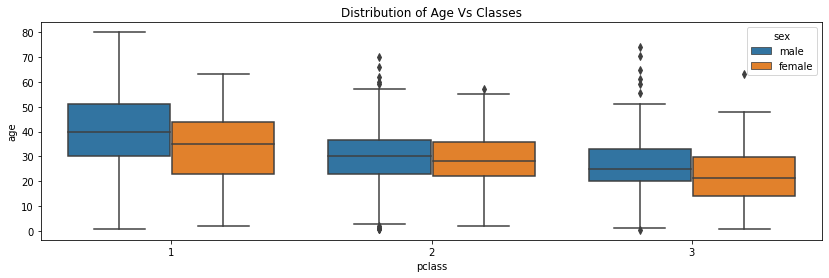

In [10]:
# Visualizing the age with respect to Class and Gender
plt.figure(figsize=(14,4))
sns.boxplot(x=data.pclass, y=data.age, hue = data.sex)
plt.title("Distribution of Age Vs Classes")
plt.show()

In [11]:
# Compute the mean age per [Pclass, Sex] group on the training set
mean_age_train = data.groupby(['pclass', 'sex'])['age'].transform('mean')
age_before = data['age'].copy()
# Fill NaN on the train and test set with the computed mean age
data['age'] = data['age'].fillna(mean_age_train)

In [12]:
# Dropping unwanted columns
data = data.drop(['deck', "embark_town",'alive','alone','adult_male','class'],axis=1)
data = data[~(data.embarked.isna())]
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,male,22.0,1,0,7.2500,S,man
1,1,1,female,38.0,1,0,71.2833,C,woman


In [13]:
# Storing the data for further vizualization
df = data.copy()
df['embarked'] = df['embarked'].map({'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'})

In [14]:
# Mapping Categorical column with numerical values
data['embarked'] = data['embarked'].map({'S':2,'C':1,'Q':0})
data['sex'] = data['sex'].map({'male':1,'female':0})
data['who'] = data['who'].map({'man':2,'woman':1,'child':0})
data.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,1,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    int64  
 8   who       889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [16]:
# describe the data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.272115,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.247458,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.750000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


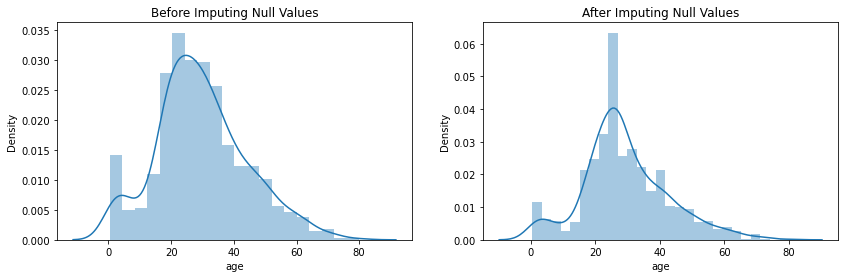

In [17]:
# Plotting Age distribution Before and after Imputing

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(age_before)
plt.title("Before Imputing Null Values")

plt.subplot(1,2,2)
sns.distplot(data.age)
plt.title("After Imputing Null Values")

plt.show()

### Clearly Majority of pepole on the ship are Young

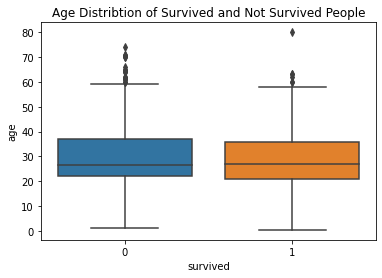

In [18]:
sns.boxplot(y=data.age, x=data.survived)
plt.title("Age Distribtion of Survived and Not Survived People")
plt.show()

### Here Age of Survivors as equally distributed as for Non Survivors

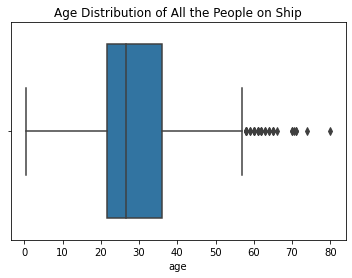

In [19]:
sns.boxplot(df.age)
plt.title("Age Distribution of All the People on Ship")
plt.show()

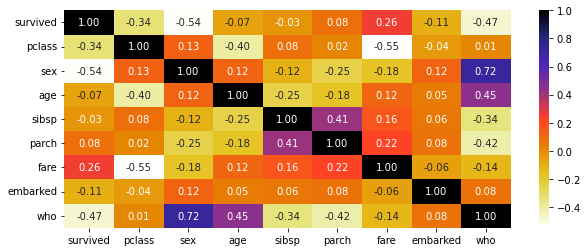

In [20]:
# FInding Correlation between various attributes of data
plt.figure(figsize=(10,4))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap=plt.cm.CMRmap_r);

### By looking at heatmap we can say there is no much of a correlation between any attributes of data

In [21]:
# Total Number of People there
df.shape[0]

889

In [22]:
# Number of people survived
df[df.survived==1].shape[0]

340

In [23]:
df.survived.value_counts(ascending=False)

0    549
1    340
Name: survived, dtype: int64

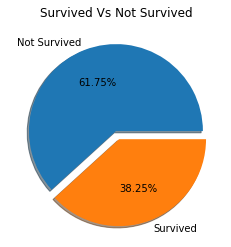

In [24]:
# Pie Chart for people who survived
plt.pie(df.survived.value_counts(ascending=False), explode=[0,0.1], 
        labels=['Not Survived','Survived'], autopct='%.2f%%', shadow=True)
plt.title("Survived Vs Not Survived")
plt.show()

### Majority of people(62%) died in titanic incident.

In [25]:
# Number of Male and Female people on the ship
df.sex.value_counts()

male      577
female    312
Name: sex, dtype: int64

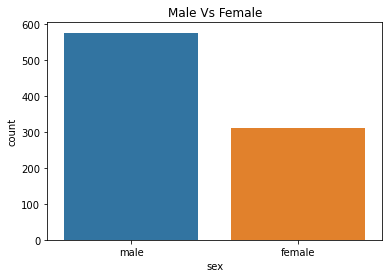

In [26]:
# plot of number of male and female
sns.countplot(df.sex)
plt.title("Male Vs Female")
plt.show()

### There are more number of male than female on Titanic Ship

In [27]:
# Number of man, woman and child
df.who.value_counts()

man      537
woman    269
child     83
Name: who, dtype: int64

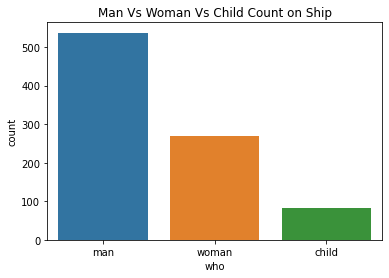

In [28]:
# plot to show the difference in number of man, woman and child
sns.countplot(df.who)
plt.title("Man Vs Woman Vs Child Count on Ship")
plt.show()

### Clearly there are more number of man than woman than child

In [29]:
# number of people from different places
df.embarked.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embarked, dtype: int64

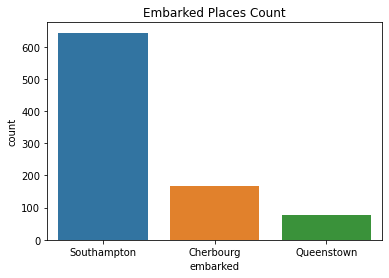

In [30]:
# Plotting the people number based on places
sns.countplot(df.embarked)
plt.title("Embarked Places Count")
plt.show()

### Majority of people are from Southampton

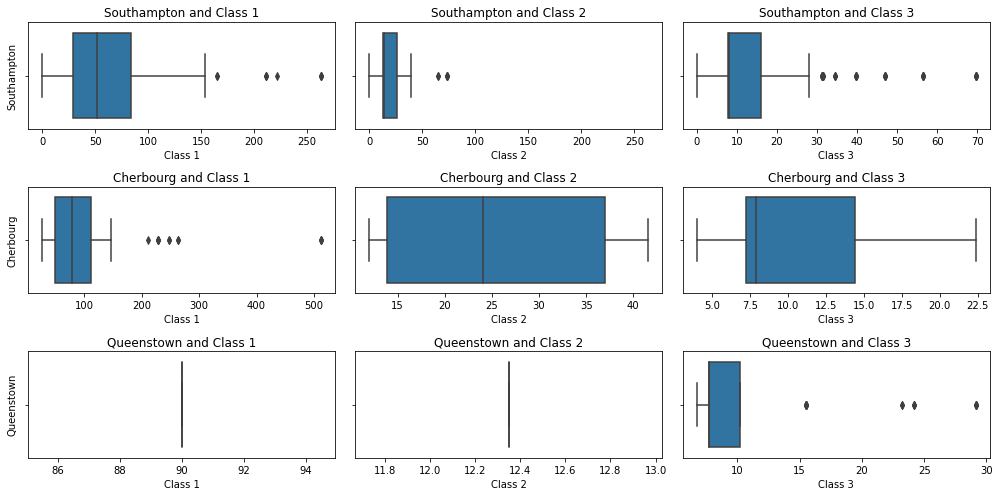

In [31]:
# Fare prices based on each places and classes
plt.figure(figsize=(14,7))

ax1=plt.subplot(3,3,1)
a = df[(df.embarked=='Southampton') & (df.pclass==1)]['fare']
sns.boxplot(a)
ax1.set_xlabel("Class 1")
ax1.set_ylabel("Southampton")
plt.title('Southampton and Class 1')

ax2=plt.subplot(3,3,2, sharex=ax1)
b = df[(df.embarked=='Southampton') & (df.pclass==2)]['fare']
sns.boxplot(b)
ax2.set_xlabel("Class 2")
plt.title('Southampton and Class 2')

ax3=plt.subplot(3,3,3)
a = df[(df.embarked=='Southampton') & (df.pclass==3)]['fare']
sns.boxplot(a)
ax3.set_xlabel("Class 3")
plt.title('Southampton and Class 3')

ax4=plt.subplot(3,3,4)
a = df[(df.embarked=='Cherbourg') & (df.pclass==1)]['fare']
sns.boxplot(a)
ax4.set_xlabel("Class 1")
ax4.set_ylabel("Cherbourg")
plt.title('Cherbourg and Class 1')

ax5=plt.subplot(3,3,5)
a = df[(df.embarked=='Cherbourg') & (df.pclass==2)]['fare']
sns.boxplot(a)
ax5.set_xlabel("Class 2")
plt.title('Cherbourg and Class 2')

ax6=plt.subplot(3,3,6)
a = df[(df.embarked=='Cherbourg') & (df.pclass==3)]['fare']
sns.boxplot(a)
ax6.set_xlabel("Class 3")
plt.title('Cherbourg and Class 3')

ax7=plt.subplot(3,3,7)
a = df[(df.embarked=='Queenstown') & (df.pclass==1)]['fare']
sns.boxplot(a)
ax7.set_xlabel("Class 1")
ax7.set_ylabel("Queenstown")
plt.title('Queenstown and Class 1')

ax8=plt.subplot(3,3,8)
a = df[(df.embarked=='Queenstown') & (df.pclass==2)]['fare']
sns.boxplot(a)
ax8.set_xlabel("Class 2")
plt.title('Queenstown and Class 2')

ax9=plt.subplot(3,3,9)
a = df[(df.embarked=='Queenstown') & (df.pclass==3)]['fare']
sns.boxplot(a)
ax9.set_xlabel("Class 3")
plt.title('Queenstown and Class 3')

plt.tight_layout()
plt.show()

In [32]:
# Average Fare from different places
df.groupby(['embarked','pclass'])['fare'].median()

embarked     pclass
Cherbourg    1         78.2667
             2         24.0000
             3          7.8958
Queenstown   1         90.0000
             2         12.3500
             3          7.7500
Southampton  1         52.0000
             2         13.5000
             3          8.0500
Name: fare, dtype: float64

In [33]:
print("Average Fare is: ")
pd.crosstab(df.embarked, df.pclass, df.fare, aggfunc='median')

Average Fare is: 


pclass,1,2,3
embarked,,,
Cherbourg,78.2667,24.00,7.8958
Queenstown,90.0000,12.35,7.7500
Southampton,52.0000,13.50,8.0500


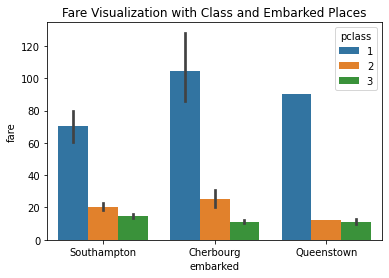

In [34]:
# Plotting 
sns.barplot(x = df.embarked, y = df.fare, hue = df.pclass);
plt.title("Fare Visualization with Class and Embarked Places")
plt.show()

### People from Cherbourg paid more fare than the other places.

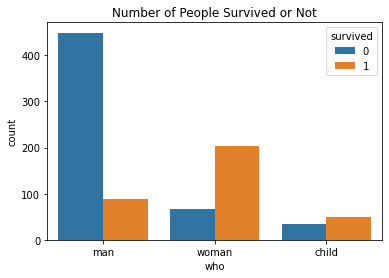

In [35]:
# People survived based on man, woman and child
sns.countplot(df.who, hue=df.survived)
plt.title("Number of People Survived or Not")
plt.show()

### There is more proportion of woman surived than that of Children. Also Man have least chances of survival than woman and child

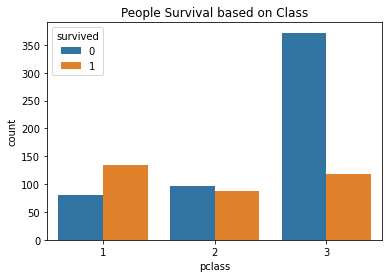

In [36]:
# People survived based on class
sns.countplot(df.pclass, hue=df.survived)
plt.title("People Survival based on Class")
plt.show()

### Survival Chances of 1st class people are More.

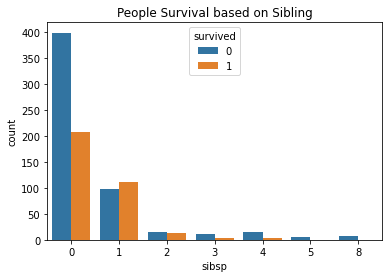

In [37]:
# People survived based on sibsp
sns.countplot(df.sibsp, hue=df.survived)
plt.title("People Survival based on Sibling")
plt.show()

### Here if we have no sibling than chances of survival is 25% but if we 1 or 2 sibling than chances of survival incresases. Further the chances decreases if sibling number incresases.

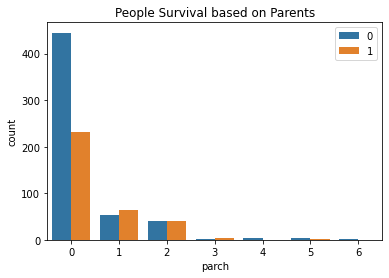

In [38]:
# People survived based on parch
sns.countplot(df.parch, hue=df.survived)
plt.title("People Survival based on Parents")
plt.legend(loc='upper right')
plt.show()

### Here if we have no family member than chances of survival is 25% but if we 1 or 2 or 3 family member than chances of survival incresases. Further the chances decreases if family member number incresases.

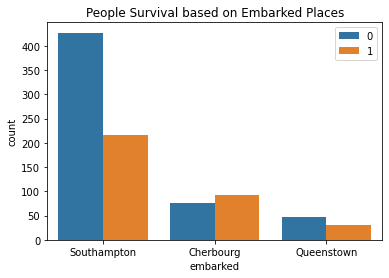

In [39]:
# People survived based on embarked
sns.countplot(df.embarked, hue=df.survived)
plt.title("People Survival based on Embarked Places")
plt.legend(loc='upper right')
plt.show()

### Cherbourgh people have more chances of survival than other two embarked towns

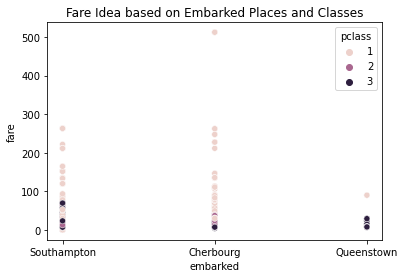

In [40]:
# Fare vaiation 
sns.scatterplot(x=df.embarked, y=df.fare, hue=df.pclass)
plt.title("Fare Idea based on Embarked Places and Classes")
plt.show()

## Conclusion (Based on this dataset)
* About 62% People died on the Titanic
* Mostly young people are there on the ship
* There more men than women than children on the Ship
* Majority of People divided on Classes are from Southampton. And the Fare paid by 1st class people of Cherbourg is more than other two places(Southampton and Queenstown).
* Outliers in fare indicate that some people paid extra to get on the Ship.
* Survival Chances:
    1. Female and Children had more than 50% chances of Survival. Men had least chances for Survival.
    2. Survival chances for 1st Class followed by 2nd and 3rd.
    3. People having 1-3 Sibling/ Family member also had better chances than 0 or more than 3.
    4. People of Cherbourg are the ones whose probability of survival is more than other two places.